In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Countplot 

## Example 1 

**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


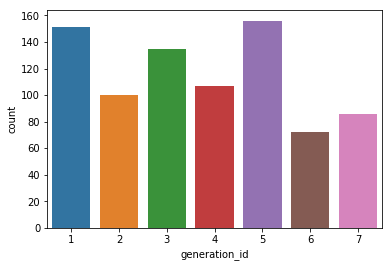

In [3]:
sns.countplot(data=pokemon,x='generation_id');

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [4]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


**Task3**: use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [5]:
type_counts=pkmn_types['type'].value_counts()
type_order = type_counts.index

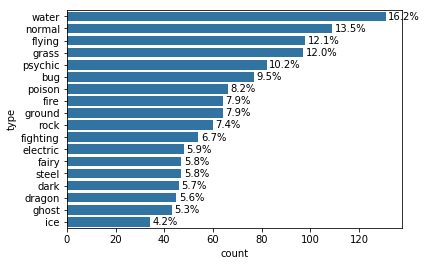

In [13]:
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types,y='type',color=base_color,order=type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/pokemon.shape[0])
    plt.text(count+1,i,pct_string,va='center')
    # count+1,i is coordination of (x,y)

## Example 2 : Using hue

In [14]:
df = pd.read_csv('train.csv') 
#titanic dataset

In [15]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


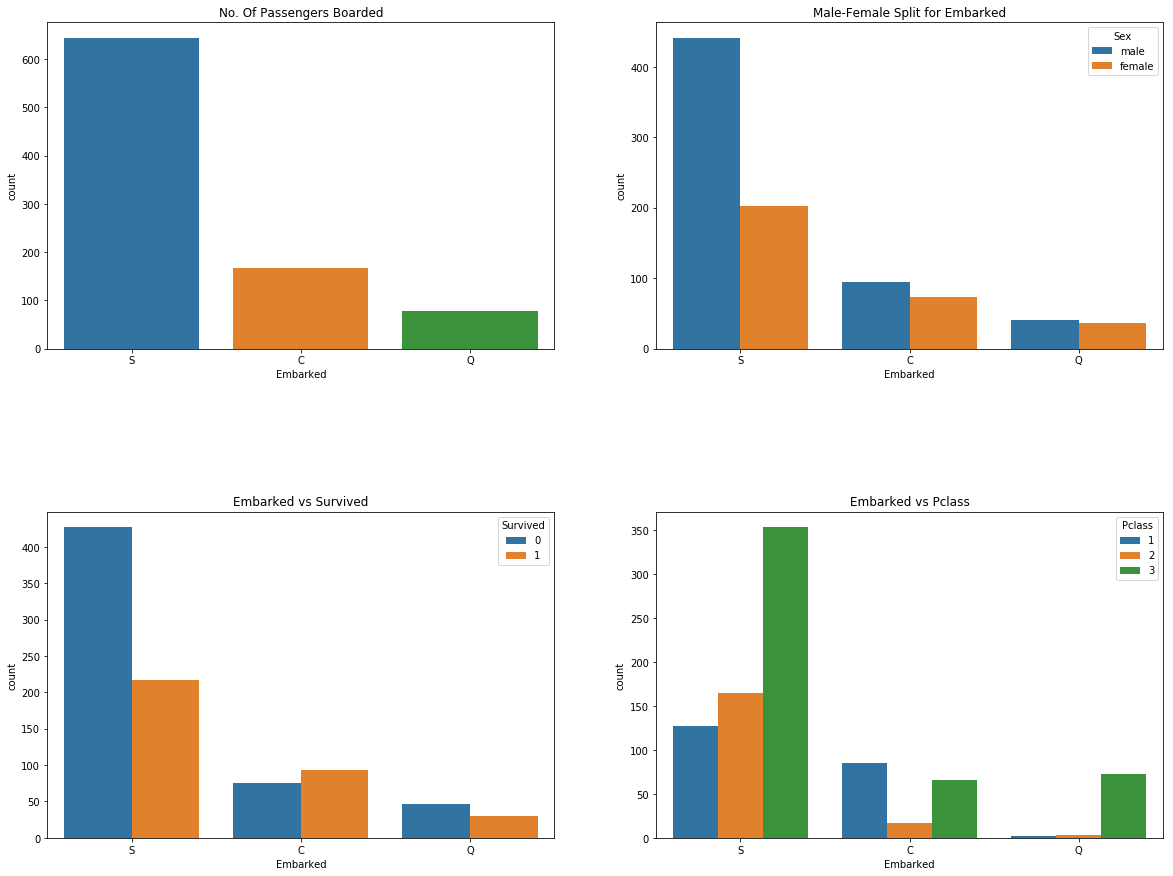

In [16]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## Example 3 

**Task:** Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) Note: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [17]:
fuel = pd.read_csv('fuel_econ.csv')

In [18]:
fuel['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [19]:
fuel_type = ['Premium Gasoline','Regular Gasoline']
# The other fule types represented in the dataset are of much lower frequency 
new_fuel_type = pd.api.types.CategoricalDtype(ordered=True,categories=fuel_type)
fuel['fuelType'] = fuel['fuelType'].astype(new_fuel_type)

In [20]:
fuel['VClass'].value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [21]:
sedan_class = ['Midsize Cars','Compact Cars','Subcompact Cars','Large Cars','Minicompact Cars']
v_class = pd.api.types.CategoricalDtype(ordered=True,categories=sedan_class)
fuel['VClass'] = fuel['VClass'].astype(v_class)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

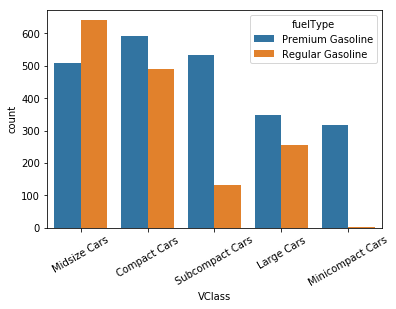

In [22]:
sns.countplot(data=fuel,x='VClass',hue='fuelType')
plt.xticks(rotation=30)

## Histogram

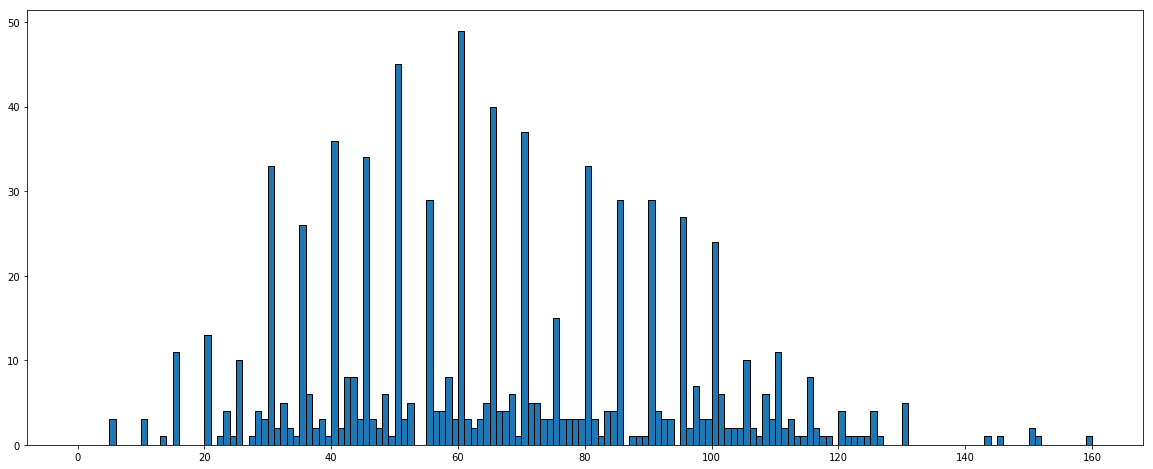

In [8]:
plt.subplots(figsize=(20,8))
bins = np.arange(0,pokemon['speed'].max()+1,1);   # rwidth = ?? , optional,The bars take up 70% of the space allocated by each bin
# np.arange(start,stop,step)
# 'start' is starting point 
# 'stop' is ending point 
# 'step' is spacing between values 
plt.hist(data=pokemon,x='speed',edgecolor='black',color=base_color,bins=bins);

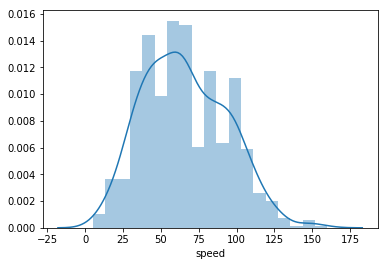

In [9]:
sb.distplot(pokemon['speed'])

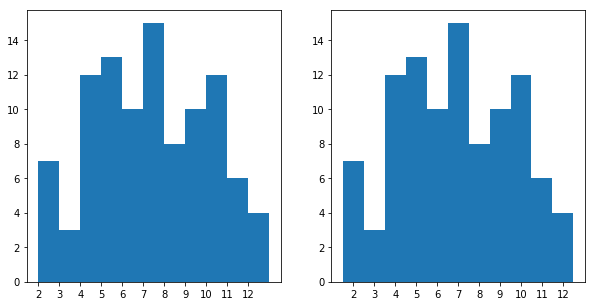

In [10]:
die_rolls_first= np.random.choice(np.arange(1,7),size=100)
die_rolls_second= np.random.choice(np.arange(1,7),size=100)
die_rolls =die_rolls_first+die_rolls_second
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))
plt.show()

You'll notice for the left histogram, in a deviation from the examples that have come before, **I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1.** Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

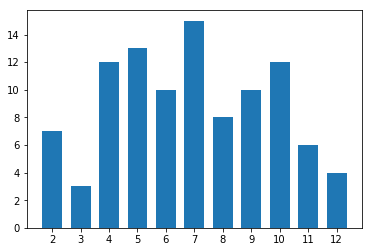

In [11]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))
plt.show()

By adding gaps between bars, **you emphasize the fact that the data is discrete in value.** On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

## Descriptive Statistics, Outliers, and Axis Limits

(0, 6)

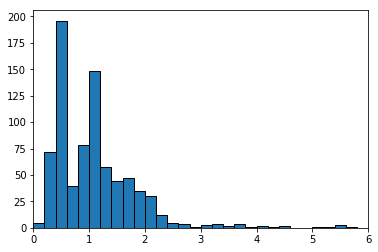

In [12]:
#plt.subplots(figsize=(20,8))
bins = np.arange(0,pokemon['speed'].max()+0.2,0.2);  
plt.hist(data=pokemon,x='height',edgecolor='black',color=base_color,bins=bins);
plt.xlim(0,6)  # add the limitation of axis  

## Scales & Transformations

There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon weight (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

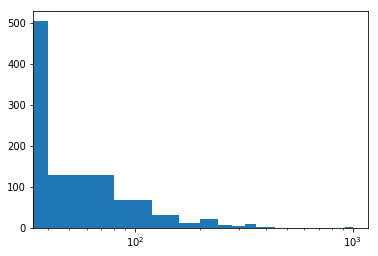

In [24]:
bins = np.arange(0,pokemon['weight'].max()+40,40)
plt.hist(data=pokemon,x='weight',bins=bins);
plt.xscale('log') # setting the scale of your x-axis to be logarithmic in scale.

# so the shape of histogram is right skewed.That's why we have to chang the bins(range)

In [25]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

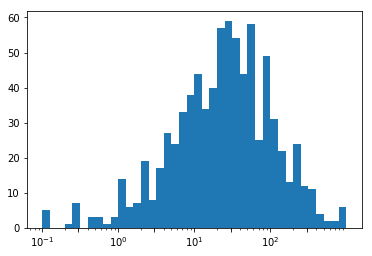

In [33]:
bins = 10**np.arange(-1,3+0.1,0.1)
plt.hist(data=pokemon,x='weight',bins=bins);
plt.xscale('log');

# change the step of x-axis 
#tick_locs = [0.1,0.3,1,3,10,30,100,300]
#plt.xticks(tick_locs);

In [23]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64